# Step 1 Get the data

## 1.1 Download the Data

### 1.1.1 import all the needed modules and libs

In [1]:
# os module is for file-path operations
# tarfile module is for compressed file operations
# urllib from six.moves is for network connection operations

import os
import tarfile
from six.moves import urllib 

### 1.1.2 define the needed CONSTANT variables

In [2]:
# DOWNLOAD_ROOT is the path of the online root directory storing the datasets directory and the tgz data file.
# HOUSING_PATH is the path of the local directory storing the tgz file and the csv file.
# HOUSING_URL is the combined path joined by DOWNLOAD_ROOT and the tgz file location.

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

### 1.1.3 define the function that can download the TGZ file and extract the CSV data file. 

In [4]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    
    # locally create the well-organised directory for storing the data files
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    
    # retrieve the compressed TGZ data file from the internet
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    
    # extract the CSV data file from the downloaded TGZ file
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()
    
    # return 0 if running successfully
    return 0

### 1.1.4 run the function to obtain the CSV data file included in a well-organised directory

In [4]:
fetch_housing_data()

URLError: <urlopen error [Errno -3] Temporary failure in name resolution>

## 1.2: Take a Quick Look at the Data Structure

### 1.2.1 Load the data with Pandas

In [3]:
# pandas is a manipulation tool as which this module is for the application of open-source data analysis.
# define a function that can return a well-defined data structure containing the data information in the CSV file.

import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    
    # csv_path is the path of the CSV file
    csv_path = os.path.join(housing_path, "housing.csv")
    
    return pd.read_csv(csv_path)

In [4]:
# run the defined function and assign the returned value to a new variable 

housing = load_housing_data()

### 1.2.2 Observe the structured data (rows of data instances, columns of features, values)

In [9]:
# head() method can return the top 5 rows of the data

housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### 1.2.3 Obtain the brief description of the data structure

In [7]:
# info() method can show the description of the data

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### 1.2.4 categorical attributes

In [8]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

### 1.2.5 Numerical attributes

In [9]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### 1.2.6 Historgram of the data

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

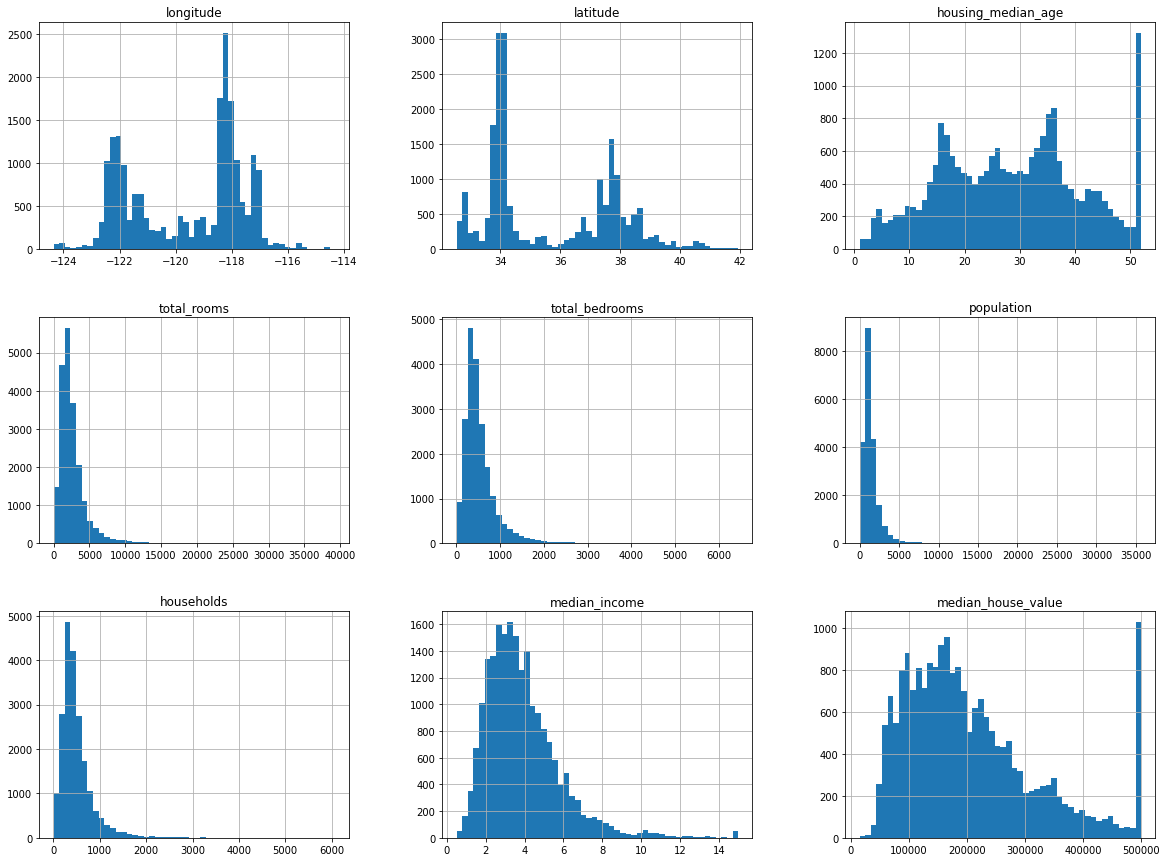

In [11]:
housing.hist(bins=50, figsize=(20, 15))
plt.show()

## 1.3 Create a Test Set 

### 1.3.1(1) randomly split the data into training set and test set

In [5]:
# scikit-learn module

from sklearn import model_selection

In [13]:
# train_test_split function

training_set, test_set = model_selection.train_test_split(housing, test_size=0.2, random_state=42)

In [15]:
len(training_set)

16512

In [16]:
len(test_set)

4128

### 1.3.1(2) stratified sampling for spliting the data 

In [5]:
# create a categorical attribute for "median_income"
# pandas for the cut function
# numpy for element calculation

import numpy as np

housing["income_cat"] = pd.cut(housing["median_income"], bins=[0, 1.5, 3, 4.5, 6, np.inf], 
                               labels=[1, 2, 3, 4, 5])

<AxesSubplot:>

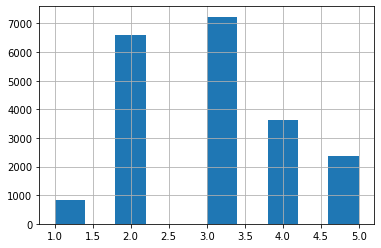

In [6]:
housing["income_cat"].hist()

In [6]:
# crate the split object

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

In [7]:
# pick split_index out of split object 

split_index = split.split(housing, housing["income_cat"])

In [8]:
# for loop for creating stratified training set and test set

for train_index, test_index in split_index:
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [9]:
# remove the "income_cat" from the splitted datasets

for set in (strat_train_set, strat_test_set):
    set.drop("income_cat", axis=1, inplace=True)

# Step 2 Discover and Visualise the Data to Gain Insights

In [10]:
# create a copy training set for experimenting with

housing = strat_train_set.copy()

## 2.1 Visualise Geographical Data

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

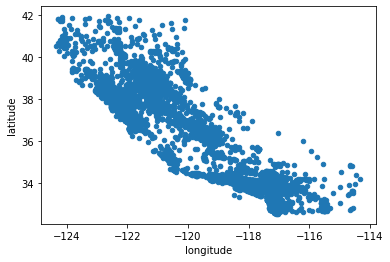

In [20]:
# Specifically for this project, there is geographical attributes (latitude and longitude)

housing.plot(kind="scatter", x="longitude", y="latitude")

<AxesSubplot:xlabel='longitude', ylabel='latitude'>

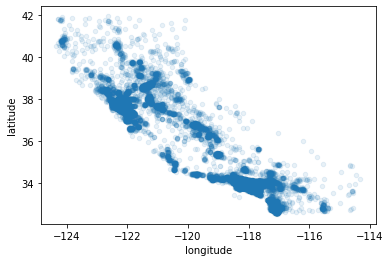

In [13]:
# option alpha: show the density of data points 

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

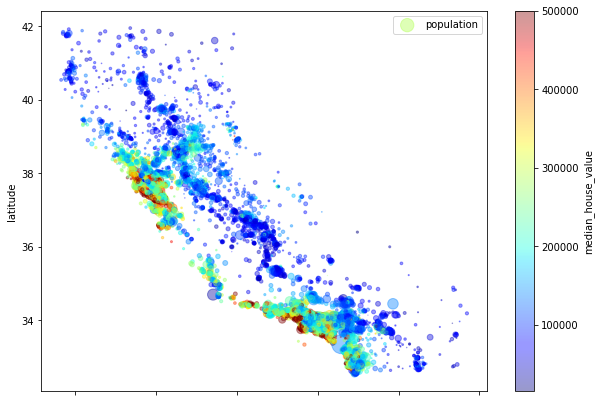

In [14]:
# option s: radius show the population
# option c: colours show the price
# option cmap "jet": low values - blue; high values - red

housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4, s=housing["population"]/100,
             label="population", figsize=(10,7), c="median_house_value", cmap=plt.get_cmap("jet"),
             colorbar=True)
plt.legend()

## 2.2 Looking for Correlations

### 2.2.1 dataFrame.corr() method from Pandas

In [11]:
# corr() method for obtaining the correlation matrix for every pair of attributes

corr_matrix = housing.corr()

In [18]:
print(corr_matrix)

                    longitude  latitude  housing_median_age  total_rooms  \
longitude            1.000000 -0.924664           -0.108197     0.044568   
latitude            -0.924664  1.000000            0.011173    -0.036100   
housing_median_age  -0.108197  0.011173            1.000000    -0.361262   
total_rooms          0.044568 -0.036100           -0.361262     1.000000   
total_bedrooms       0.069608 -0.066983           -0.320451     0.930380   
population           0.099773 -0.108785           -0.296244     0.857126   
households           0.055310 -0.071035           -0.302916     0.918484   
median_income       -0.015176 -0.079809           -0.119034     0.198050   
median_house_value  -0.045967 -0.144160            0.105623     0.134153   

                    total_bedrooms  population  households  median_income  \
longitude                 0.069608    0.099773    0.055310      -0.015176   
latitude                 -0.066983   -0.108785   -0.071035      -0.079809   
housing_

In [14]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

### 2.2.2 scatter_matrix() function from pandas.plotting

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

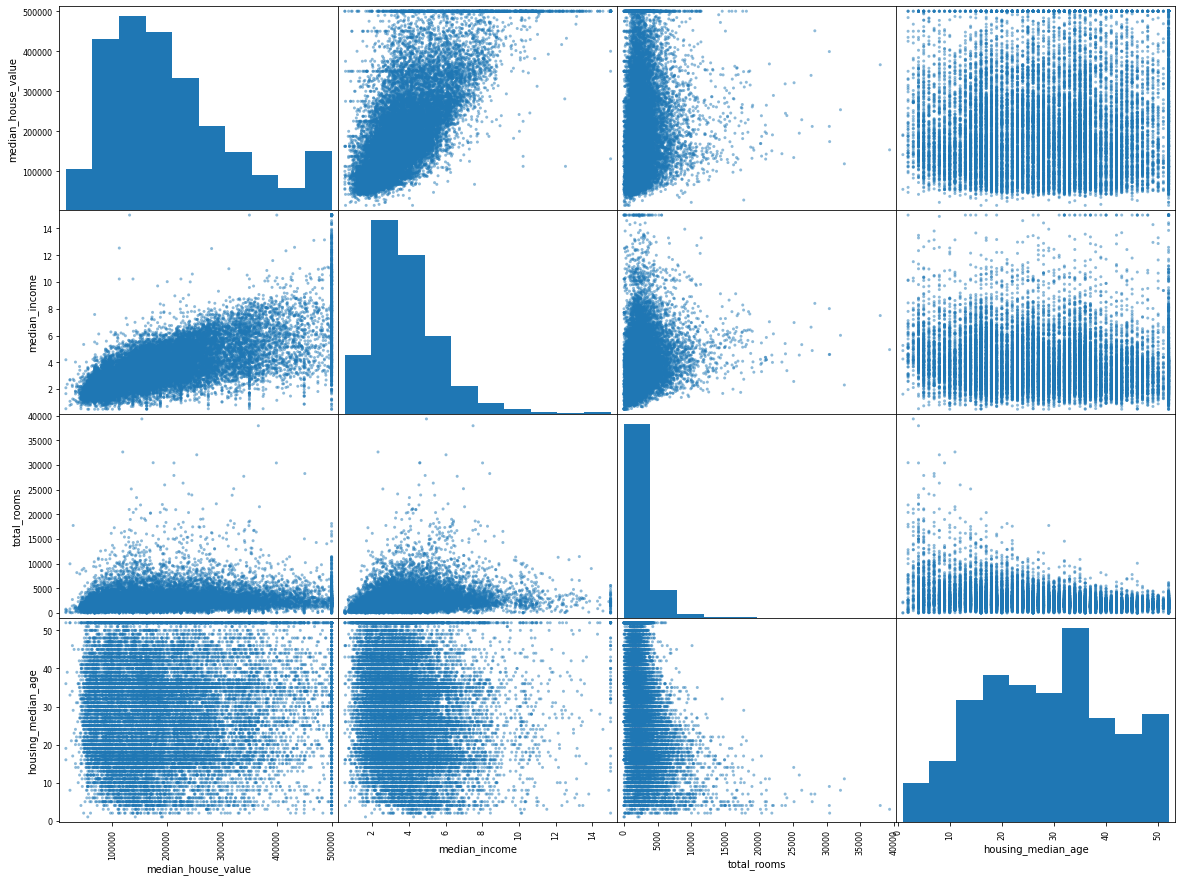

In [19]:
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]

scatter_matrix(housing[attributes], figsize=(20, 15))

### 2.2.3 plotting representation of correlation between the target value and the most promising attribute

In [20]:
# from the results of the above 2 methods, "median_income" can be the most promising attribute

# 0.6 person's correlation computed by the corr_matrix["median_house_value"].sort_values() given by dataFrame.corr() method
# showing a positive correlation trend output by scatter_matrix(dataFrame[attributes], figsize=(a, b))

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

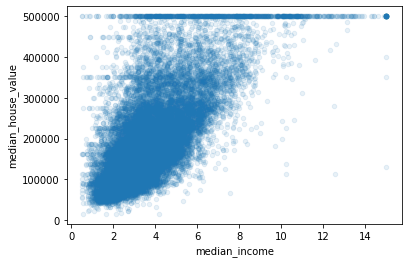

In [28]:
# dataFrame.plot(kind, x, y, alpha) mentioned above (Section 2.1) can be applied again 

housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

## 2.3 Experimenting with Attribute Combination

### 2.3.1 Create new combined attributes

In [11]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]

In [12]:
housing["bedrooms_per_room"] = housing["total_bedrooms"] / housing["total_rooms"]

In [13]:
housing["population_per_household"] = housing["population"] / housing["households"]

### 2.3.2 correlations between target value and the new attributes

In [14]:
corr_matrix = housing.corr()

In [15]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

<AxesSubplot:xlabel='bedrooms_per_room', ylabel='median_house_value'>

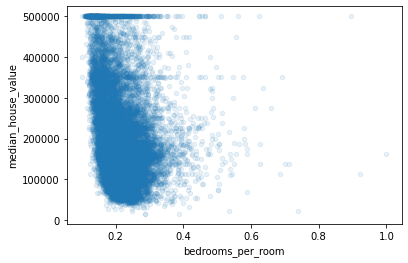

In [18]:
housing.plot(kind="scatter", x="bedrooms_per_room", y="median_house_value", alpha=0.1)

# Step 3 Prepare the Data for Machine Learning Algorithms 
# - (Data Preprocessing)

## 3.0 isolate the training set from the labels

### 3.0.1 obtain the training set without labels

In [14]:
housing = strat_train_set.drop("median_house_value", axis=1)

### 3.0.2 obtain the lebels 

In [15]:
housing_labels = strat_train_set["median_house_value"].copy()

## 3.1 Data Cleaning

### 3.1.1 pandas method for missing values

In [26]:
# dataFrame["attribute"].median() method 

median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)

### 3.1.2 Sklearn method for missing values

In [16]:
# import the lib

from sklearn.impute import SimpleImputer

In [17]:
# create a class object called imputer

imputer = SimpleImputer(strategy="median")

In [18]:
# create a copy of data without the text attribute 

housing_num = housing.drop("ocean_proximity", axis=1)

In [19]:
# train the created data with fit() method

imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [20]:
# transform the training set

X = imputer.transform(housing_num)

In [21]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns)

## 3.2 Handling Text and Categorical Attributes

### 3.2.1 Take a look at the attribute

In [23]:
# have a look at the text attribute in attribute object form
housing["ocean_proximity"].head()

17606     <1H OCEAN
18632     <1H OCEAN
14650    NEAR OCEAN
3230         INLAND
3555      <1H OCEAN
Name: ocean_proximity, dtype: object

In [30]:
# have a look at the text attribute in dataFrame form

housing[["ocean_proximity"]].head()

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN


In [22]:
# assigh the dataFrame representation of the attribute

housing_cat = housing[["ocean_proximity"]]

### 3.2.2 preprocess - encoding 

#### 3.2.2.1 ordinal encoding

In [23]:
# create a new sklearn estimator: encoder

from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

#### 3.2.2.2 One-hot encoding

In [24]:
# create a new sklearn estimator: encoder

from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()
housing_cat_1hot = one_hot_encoder.fit_transform(housing_cat)

In [25]:
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [28]:
print(housing_cat_1hot)

  (0, 0)	1.0
  (1, 0)	1.0
  (2, 4)	1.0
  (3, 1)	1.0
  (4, 0)	1.0
  (5, 1)	1.0
  (6, 0)	1.0
  (7, 1)	1.0
  (8, 0)	1.0
  (9, 0)	1.0
  (10, 1)	1.0
  (11, 1)	1.0
  (12, 0)	1.0
  (13, 1)	1.0
  (14, 1)	1.0
  (15, 0)	1.0
  (16, 3)	1.0
  (17, 1)	1.0
  (18, 1)	1.0
  (19, 1)	1.0
  (20, 0)	1.0
  (21, 0)	1.0
  (22, 0)	1.0
  (23, 1)	1.0
  (24, 1)	1.0
  :	:
  (16487, 1)	1.0
  (16488, 1)	1.0
  (16489, 4)	1.0
  (16490, 3)	1.0
  (16491, 0)	1.0
  (16492, 3)	1.0
  (16493, 1)	1.0
  (16494, 1)	1.0
  (16495, 0)	1.0
  (16496, 1)	1.0
  (16497, 3)	1.0
  (16498, 1)	1.0
  (16499, 0)	1.0
  (16500, 0)	1.0
  (16501, 0)	1.0
  (16502, 4)	1.0
  (16503, 0)	1.0
  (16504, 1)	1.0
  (16505, 1)	1.0
  (16506, 0)	1.0
  (16507, 1)	1.0
  (16508, 1)	1.0
  (16509, 1)	1.0
  (16510, 0)	1.0
  (16511, 3)	1.0


In [25]:
housing_cat_1hot_array = housing_cat_1hot.toarray()

In [36]:
housing_cat_1hot_array

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [39]:
one_hot_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

## 3.3 Custom Transformers

### an example: CombinedAttributeAdder estimator for attribute combination experiments

In [26]:
# import the base estimator Class for obtaining certain useful methods

from sklearn.base import BaseEstimator, TransformerMixin

In [27]:
# define the index of all the requied attributes 

rooms_ix = 3
bedrooms_ix = 4
population_ix = 5
households_ix = 6

In [28]:

# create a new Class of the Estimator

class CombineAttributesAdder(BaseEstimator, TransformerMixin):
    
    # variables or attributes of the class
    def __init__(self, add_bedrooms_per_room=True):
        
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    # fit method
    def fit(self, X, y=None):
       
        return self
    
    # tranform method
    def transform(self, X, y=None):
        
        # calculate the basic required attribute values
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        
        # calculate the conditional required attribute values
        if self.add_bedrooms_per_room:
            
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        
        else:
            return np.c_[X, rooms_per_household, population_per_household]
            
        

## 3.4 Feature Scaling 

### 3.4.1 sklearn.preprocessing.MinMaxScaler

### 3.4.2 sklearn.preprocessing.StandardScaler

## 3.5 Transfermation Pipelines 

### 3.5.1 Numerical Attributes transformation pipeline

In [29]:
# import all the Class Object 

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [30]:
# create the class ojbect of numerical attribute transformation pipeline

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombineAttributesAdder()),
    ('std_scaler', StandardScaler()),
    ])


In [31]:
# obtain the transformed training set

housing_num_tr = num_pipeline.fit_transform(housing_num)

### 3.5.2 all attributes transformation pipeline

In [31]:
# import all the Class object libs

from sklearn.compose import ColumnTransformer

In [32]:
# get lists of numerical and categorical attributes repectively

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

In [33]:
# create the class object of transformation pipeline

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(), cat_attribs),
    ])

In [34]:
# obtain the transformed training set

housing_prepared = full_pipeline.fit_transform(housing)

# Step 4 Select and Train a Model

## 4.1 Training and Evaluating on the Training Set

### 4.1.1 Try the first model: Linear Regression

In [35]:
# import the lib for LR model

from sklearn.linear_model import LinearRegression

In [36]:
# create the class object of LR model

lin_reg = LinearRegression()

In [37]:
# fit operation 

lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

### 4.1.2 try some data instances with this fitted model

In [38]:
# obtain some data from the original training_set and labels

some_data = housing.iloc[: 5]
some_labels = housing_labels[: 5]

In [39]:
# pre-process the obtained data

some_data_prepared = full_pipeline.transform(some_data)

In [40]:
# predict the results 

pred = lin_reg.predict(some_data_prepared)

In [41]:
# compare the prediction with given labels

print("Prediction results: {}".format(list(int(result) for result in pred)))
print("Given labels: {}".format(list(int(label) for label in some_labels)))

Prediction results: [210644, 317768, 210956, 59218, 189747]
Given labels: [286600, 340600, 196900, 46300, 254500]


### 4.1.3 Loss Function: RMSE of the LR model

In [42]:
# import the lib
from sklearn.metrics import mean_squared_error

# obtain the MSE
lin_mse = mean_squared_error(housing_labels, lin_reg.predict(housing_prepared))

# obtain the RMSE
lin_rmse = np.sqrt(lin_mse)

In [43]:
print(lin_rmse)

68628.19819848922


### 4.1.4 Try the second model: Decision Tree Regression

In [44]:
# import the lib 
from sklearn.tree import DecisionTreeRegressor

# create the class object
tree_reg = DecisionTreeRegressor()

# fit operation
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [45]:
# predict the results

tree_pred = tree_reg.predict(housing_prepared)

### 4.1.5 Loss Function: RMSE of the Decision Tree model

In [46]:
# obtain the MSE
tree_mse = mean_squared_error(housing_labels, tree_pred)

# obtain the RMSE
tree_rmse = np.sqrt(tree_mse)

In [47]:
print(tree_rmse)

0.0


### 4.1.6 Cross Validation for model selection

#### 4.1.6.1 the Decision Tree model K-fold Cross-Validation

In [48]:
# import the lib

from sklearn.model_selection import cross_val_score

In [49]:
# obtain the numpy array of MSEs of all the 10 validation results

scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)

In [50]:
# obtain the numpy array of corresponding RMSEs

tree_rmse_scores = np.sqrt(-scores)

In [51]:
# define a function to display the statistical results of the RMSEs

def display_scores(scores):
    
    print("Scores: {}".format(scores))
    print("Means: {}".format(scores.mean()))
    print("Standard deviation: {}".format(scores.std()))
    
    return 0

In [52]:
# display the statistics by running the function

display_scores(tree_rmse_scores)

Scores: [67722.42664805 65690.00115311 70853.62339065 69056.26301222
 70311.95212789 73763.16648507 70477.12022111 71401.12906688
 75857.36103809 69728.58879178]
Means: 70486.1631934843
Standard deviation: 2717.555541074277


0

#### 4.1.6.2 the Linear Regression model K-fold Cross-Validation

In [53]:
# obtain the numpy array of MSEs of all the 10 validation results
lin_reg_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)

# obtain the numpy array of corresponding RMSEs
lin_reg_rmse_scores = np.sqrt(-lin_reg_scores)

# display the statistics by running the function
display_scores(lin_reg_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Means: 69052.46136345083
Standard deviation: 2731.6740017983498


0

### 4.1.7 Try the third model: Random Forest Regression

In [54]:
# import the lib 
from sklearn.ensemble import RandomForestRegressor

# create the class object
forest_reg = RandomForestRegressor()

# fit operation
forest_reg.fit(housing_prepared, housing_labels)

# obtain the MSE of the fitted model on the training set
forest_mse = mean_squared_error(housing_labels, forest_reg.predict(housing_prepared))

# obtain the corresponding RMSE
forest_rmse = np.sqrt(forest_mse)


# obtain the MSEs of the fitted model on the validation set
forest_reg_scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)

# obtain the numpy array of the corresponding RMSEs on the validation set
forest_reg_rmse_scores = np.sqrt(-forest_reg_scores)

# display the statistics by running the function
display_scores(forest_reg_rmse_scores)

print("==== RMSE on the training set: {} ====".format(forest_rmse))
print("==== mean RMSE on the validation set: {} ====".format(forest_reg_rmse_scores.mean()))


Scores: [49702.79047512 47363.00432873 49526.02552584 52387.20604008
 49241.72025336 53644.23076986 49061.69586716 47916.2879687
 53109.78900043 49979.03484175]
Means: 50193.17850710061
Standard deviation: 2033.253759719577
==== RMSE on the training set: 18771.508206837458 ====
==== mean RMSE on the validation set: 50193.17850710061 ====


# Step 5 Fine-Tune the Model

## 5.1 Grid Search - optimal hyper-parameter combination search for small hyper-parameter space

In [55]:
# import the lib

from sklearn.model_selection import GridSearchCV

In [56]:
# create the list containing hyper-parameter name-values dictionaries

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
    ]

In [57]:
# create the class object of random forest regression model

forest_reg = RandomForestRegressor()

In [58]:
# create the class object of grid search 

grid_search = GridSearchCV(forest_reg, param_grid, cv=5, 
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

In [59]:
# fit operation

grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [60]:
# check the best hyper-parameter combination 

print("The optimal hyper-parameters include: {}".format(grid_search.best_params_))

The optimal hyper-parameters include: {'max_features': 8, 'n_estimators': 30}


In [61]:
# check the best estimator 

print("The best estimator should be the model: {}".format(grid_search.best_estimator_))

The best estimator should be the model: RandomForestRegressor(max_features=8, n_estimators=30)


In [62]:
# find the RMSE of the optimal estimator

## create the Cross-Validation grid search Statistical results
cvres = grid_search.cv_results_

## iterate to find the mean RMSE of the best estimator's Cross-Validation results
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    
    if params == grid_search.best_params_:
        print("The mean RMSE of the Cross-Validation results on the model with the optimal Hyper-parameters is: {}".format(np.sqrt(-mean_score)))



The mean RMSE of the Cross-Validation results on the model with the optimal Hyper-parameters is: 49984.69149007928


## 5.2 Randomised Search - optimal hyper-parameter combination search for large hyper-parameter space

In [63]:
# import the lib
from sklearn.model_selection import RandomizedSearchCV

# create the list containing hyper-parameter name&value-list dictionaries
param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]}
    ]

# create the class object of random forest regression model
foreset_reg = RandomForestRegressor()

# create the class object of randomised search
randomised_search = RandomizedSearchCV(foreset_reg, param_grid, cv=5, 
                                      scoring="neg_mean_squared_error", 
                                      return_train_score=True)

# fit operation
randomised_search.fit(housing_prepared, housing_labels)

# check the best estimator
print("The optimal estimator is: {}".format(randomised_search.best_estimator_))

# check the best hyper-parameter combination
print("The best hyper-parameters include: {}".format(randomised_search.best_params_))

#find the RMSE of the optimal estimator

## create the statistical results
cvres = randomised_search.cv_results_

## iterate to find the mean RMSE of the best estimator's Cross-Validation results
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    
    if params == randomised_search.best_params_:
        print("The mean RMSE of the Cross-Validation results on the model with the optimal hyper-parameters is : {}".format(np.sqrt(-mean_score)))

The optimal estimator is: RandomForestRegressor(max_features=6, n_estimators=30)
The best hyper-parameters include: {'n_estimators': 30, 'max_features': 6}
The mean RMSE of the Cross-Validation results on the model with the optimal hyper-parameters is : 49674.14445439665


## 5.3 Analyse the Best Models and their Errors

### 5.3.1 Feature importances

In [64]:
# create the feature importances 
feature_importances = grid_search.best_estimator_.feature_importances_

# display them
print(feature_importances)

[6.83158953e-02 6.16631936e-02 4.34417660e-02 1.57845346e-02
 1.55718527e-02 1.53164864e-02 1.40626471e-02 3.72789265e-01
 4.99565956e-02 1.12011781e-01 6.34170873e-02 9.52345581e-03
 1.51943650e-01 1.13575464e-04 2.16654287e-03 3.92167142e-03]


In [65]:
# display the attribute name with the importances in pairs

extra_attribs = ["rooms_per_household", "population_per_household", "bedrooms_per_room"]

cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])

attributes = num_attribs + extra_attribs + cat_one_hot_attribs

sorted(zip(feature_importances, attributes), reverse=True)

[(0.3727892650456334, 'median_income'),
 (0.15194365005676033, 'INLAND'),
 (0.1120117807231435, 'population_per_household'),
 (0.06831589528234187, 'longitude'),
 (0.06341708728445172, 'bedrooms_per_room'),
 (0.061663193563015084, 'latitude'),
 (0.049956595624257805, 'rooms_per_household'),
 (0.04344176599454718, 'housing_median_age'),
 (0.015784534647360335, 'total_rooms'),
 (0.015571852722296445, 'total_bedrooms'),
 (0.01531648642269877, 'population'),
 (0.014062647066911573, 'households'),
 (0.00952345580725921, '<1H OCEAN'),
 (0.003921671421965117, 'NEAR OCEAN'),
 (0.002166542873134084, 'NEAR BAY'),
 (0.00011357546422368561, 'ISLAND')]

## 5.4 Evaluate the System on the Test Set

In [67]:
# create the finally chosen model which is the best estimator
final_model = grid_search.best_estimator_

# create the test feature set without the labels
X_test = strat_test_set.drop("median_house_value", axis=1)

# create the test label set with the labels
y_test = strat_test_set["median_house_value"].copy()

# transform the test feature set into preprocessed set
X_test_prepared = full_pipeline.transform(X_test)

# output the prediction results
final_predictions = final_model.predict(X_test_prepared)

# obtain the MSE of the results
final_mse = mean_squared_error(y_test, final_predictions)

# obtain the RMSE of the results
final_rmse = np.sqrt(final_mse)

print("The final RMSE of the optimal model on the test set is: {}".format(final_rmse))

The final RMSE of the optimal model on the test set is: 47952.34229347919


In [68]:
# calculate the 95% CONFIDENCE INTERVAL

## import the lib
from scipy import stats

## create the 95% confidence
confidence = 0.95

## create the array of squared errors
squared_errors = (final_predictions - y_test) ** 2

## output the 95% CONFIDENCE INTERVAL result
confidence_interval_95 = np.sqrt(stats.t.interval(confidence, len(squared_errors)-1, loc=squared_errors.mean(),
                                                 scale=stats.sem(squared_errors)))
print(confidence_interval_95)

[45892.80997535 49926.98924859]
